# Analysis for Defects in GaN

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Converging values with increasing cutoff

Done in the primitive cell at the PBE level. Relaxed with volume change then SCF. 

In [ ]:
# Cutoff energy in VASP
ENCUT = np.array([400,520,600,650])

# Total relaxed energy
Etot = np.array([-24.29584864, -24.30076274, -24.30368614, -24.30747166])

# Band gap
Egap = np.array([1.819593, 1.714369, 1.714394, ])

# Cell parameters
# There were no changes in the CONTCAR between 520-650 eV cutoff
a = np.array([3.20032, 3.21896, 3.21896, 3.21896])
c = np.array([5.20969, 5.24045, 5.24045, 5.24045])
u = np.array([1.96334, 1.97545, 1.97545, 1.97545])

## DOS and PDOS

Want to look at the fraction of the DOS localized on the different atoms.

First start with the primitive cell. Read the DOS and PDOS files.

In [2]:
file_path = f'GaN/primitive/TDOS.dat'
TDOS = np.loadtxt(file_path, skiprows=1)

file_path = f'GaN/primitive/PDOS_Ga.dat'
PDOS_Ga = np.loadtxt(file_path, skiprows=1, usecols=(0, -1))

file_path = f'GaN/primitive/PDOS_N.dat'
PDOS_N = np.loadtxt(file_path, skiprows=1, usecols=(0, -1))

Plot all of the data together.

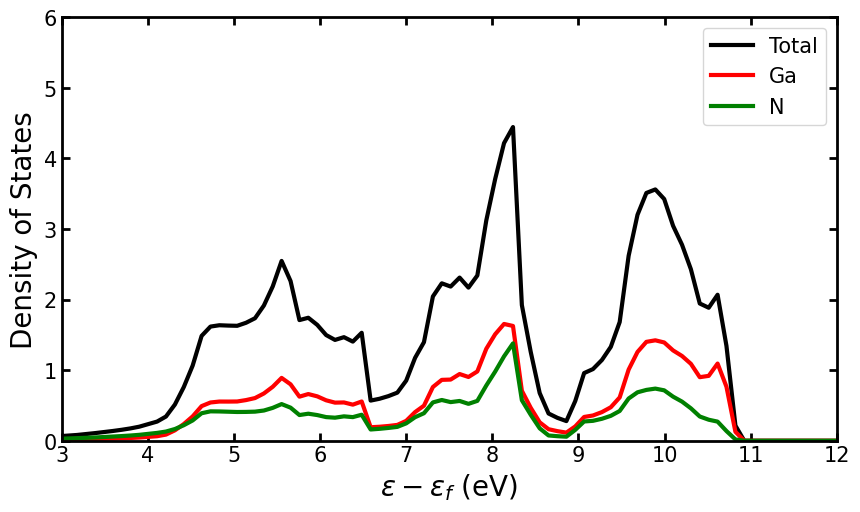

In [4]:
plt.figure(figsize=(10,5.5))

# Paper figure with smeared results
plt.plot(TDOS[:,0], TDOS[:,1], color='black', label='Total', linewidth=3)
plt.plot(PDOS_Ga[:,0], PDOS_Ga[:,1], color='red', label='Ga', linewidth=3)
plt.plot(PDOS_N[:,0], PDOS_N[:,1], color='green', label='N', linewidth=3)

# Labels
plt.xlabel('$\epsilon-\epsilon_f$ (eV)', fontsize=20)
plt.ylabel('Density of States', fontsize=20)

# Plot formatting
plt.legend(loc='upper right', fontsize=15)  # Move the legend to the top right and increase font size
plt.xticks(fontsize=15)  # Increase x-axis tick font size
plt.yticks(fontsize=15)  # Increase y-axis tick font size
plt.xlim(3,12)
plt.ylim(0,6)
ax = plt.gca()
ax.spines['top'].set_linewidth(2.0)   # Top border
ax.spines['right'].set_linewidth(2.0) # Right border
ax.spines['bottom'].set_linewidth(2.0)  # Bottom border (default width)
ax.spines['left'].set_linewidth(2.0)    # Left border (default width)
ax.tick_params(axis='both',  # Apply to both x and y axes
               which='both',  # Apply to both major and minor ticks
               direction='in',  # Tick direction (inward and outward)
               width=2,  # Thickness of the tick marks
               length=6, # Length of the tick marks
               bottom=True, top=True, left=True, right=True)  
plt.show()

It looks like the conduction-band states are mostly localized on the Ga atoms, except at the very bottom of the conduction band. Xiaoguang says that we may get a slight $\Delta q$ with transitions across the inflection point around 4.3 eV, but we will likely need the defect to break the symmetry.

## Formation Energy of N Antisite

Want to see if I match the previously-reported results for formation energies. The chemical potentials are related by $$\mu_{\text{Ga}} + \mu_{\text{N}} = \mu_{\text{GaN}}^\text{bulk}$$

First set those individual chemical potentials.

In [5]:
Etot_Ga = -23.21349307 # 8 atoms
Etot_N2 = -16.63527343 # 2 atoms in ~10x10x10 A cell

I originally calculated many different combinations of supercell size, k-point mesh, and geometry for the formation energies. Based on discussion with Sok, we do not need to be worried about reproducing previous results exactly, as long as we are within about 0.5 eV. The results below are for the 5x3x3 supercell with a $\Gamma$-only k-point mesh and the bond closer to along the $b$ direction. 

In [17]:
Etot_defect = -2182.24869595 
Etot_perf = -2184.16494905 # 180 pairs

mu_GaN = Etot_perf/180

For Ga-rich conditions, set the Ga chemical potential to that of Ga a bulk Ga crystal.

In [14]:
mu_Ga = Etot_Ga/8
mu_N = mu_GaN - mu_Ga

Etot_defect - Etot_perf + mu_Ga - mu_N

8.247129549444166

For N-rich conditions, set the N chemical potential to that of N in an N$_2$ molecule.

In [22]:
mu_N = Etot_N2/2
mu_Ga = mu_GaN - mu_N

Etot_defect - Etot_perf + mu_Ga - mu_N

6.417276813055279